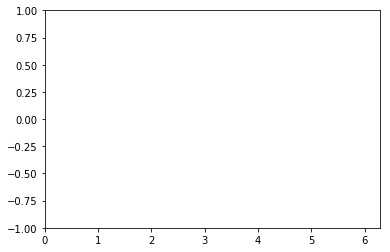

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import Constants.SI as SI
global c, eps0, e, me
c = SI.lightSpeed;
eps0 = SI.permFreeSpace
e = SI.elemCharge
me = SI.elecMass

In [23]:
# Ionizing in VSIM 
# Need normalized vector potential for a given intensity
lam   = 800e-9; # laser wavelength (m)
dpump = 30e-15; # pulse duration (s)
w0    = 50e-6; # waist radius of beam (m)
x0    = 5e-6; # longitudinal position of pulse waist
I     = 4e14; # laser intensity at focus (W/cm^2)
def get_a0(lam, I):
    # lam must be in microns
    return .85e-9 * lam * 1e6 * np.sqrt(I)
def get_El(lam, I, a0):
    # lam must be in microns
    # Remember to return in V/m
    return (3.2 * a0 / (lam * 1e6)) * 1e12
def get_a(lam, I, El):
    w = (2 * np.pi * c / lam)
    return e * El / (w * me * c)

In [24]:
a0 = get_a0(lam, I)
El = get_El(lam, I, a0)
a = get_a(lam, I, El)
print(a) 

0.0135546720213


In [26]:
El / 1e9

54.400000000000006

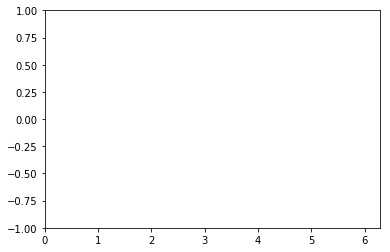

In [20]:
x = np.random.rand(5,3)
y = x**2;

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
ani.save('/home/keenan/Desktop/test.mp4')